# Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler,LabelEncoder
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


# Load Data

In [2]:
iris = pd.read_csv("Iris.csv")
iris = iris.drop(['Id'],axis=1)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
label = LabelEncoder()
species_trans = label.fit_transform(iris['Species'])
iris['Species'] = species_trans
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
X = iris.drop(['Species'],axis=1)
Y = iris['Species']

# Split Dataset

In [5]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0,stratify=Y)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(120, 4) (30, 4) (120,) (30,)


In [6]:

forest = RandomForestClassifier(
    n_estimators=100,
    criterion='gini',        
    max_depth=None,           
    min_samples_split=2,      
    min_samples_leaf=1,        
    random_state=0,           
    n_jobs=-1                  
)



In [ ]:

forest.fit(X_train, Y_train)

X_train_pred = forest.predict(X_train)
X_test_pred = forest.predict(X_test)

train_accuracy = accuracy_score(Y_train, X_train_pred)

test_accuracy = accuracy_score(Y_test, X_test_pred)

print(f"Train Accuracy: {train_accuracy:}")
print(f"Test Accuracy: {test_accuracy:}")


Train Accuracy: 1.0000
Test Accuracy: 0.9333


In [8]:
print(classification_report(Y_train,X_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        40

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [9]:
print(classification_report(Y_test,X_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



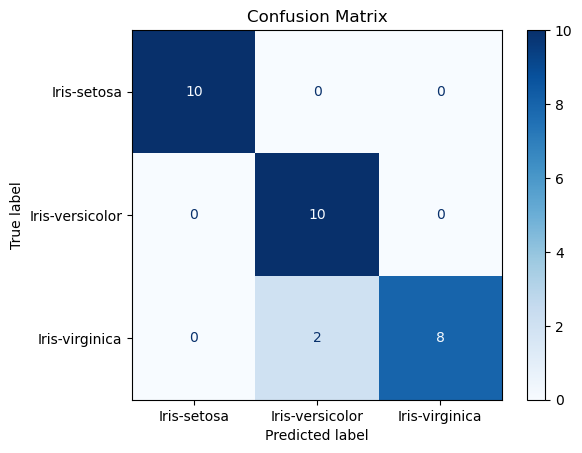

In [14]:
conf_mat = confusion_matrix(Y_test, X_test_pred)
Matrix = ConfusionMatrixDisplay(confusion_matrix=conf_mat,display_labels=label.classes_)
Matrix.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [11]:

param = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None,2,4,6,8],
    'min_samples_split': [2,5,10,15,17],
    'min_samples_leaf': [1,2,4,8],
    'criterion': ['gini', 'entropy']
}


grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=0),
    param_grid=param,
    cv=2,                       
    scoring='accuracy',
    n_jobs=-1,                                   
)


grid_search.fit(X_train, Y_train)


print(f"Best Parameters from GridSearchCV: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")


best_forest = grid_search.best_estimator_

X_train_pred_best = best_forest.predict(X_train)
train_accuracy_best = accuracy_score(Y_train, X_train_pred_best)
print(f"Test Accuracy with Best Parameters: {train_accuracy_best:.4f}")

X_test_pred_best = best_forest.predict(X_test)
test_accuracy_best = accuracy_score(Y_test, X_test_pred_best)
print(f"Test Accuracy with Best Parameters: {test_accuracy_best:.4f}")


Best Parameters from GridSearchCV: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.9667
Test Accuracy with Best Parameters: 0.9583
Test Accuracy with Best Parameters: 0.9333


In [12]:

print("Classification Report - Training Set (Best Estimator):")
print(classification_report(Y_train, X_train_pred_best, target_names=label.classes_))

print("Classification Report - Testing Set (Best Estimator):")
print(classification_report(Y_test, X_test_pred_best, target_names=label.classes_))

Classification Report - Training Set (Best Estimator):
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        40
Iris-versicolor       0.93      0.95      0.94        40
 Iris-virginica       0.95      0.93      0.94        40

       accuracy                           0.96       120
      macro avg       0.96      0.96      0.96       120
   weighted avg       0.96      0.96      0.96       120

Classification Report - Testing Set (Best Estimator):
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.83      1.00      0.91        10
 Iris-virginica       1.00      0.80      0.89        10

       accuracy                           0.93        30
      macro avg       0.94      0.93      0.93        30
   weighted avg       0.94      0.93      0.93        30



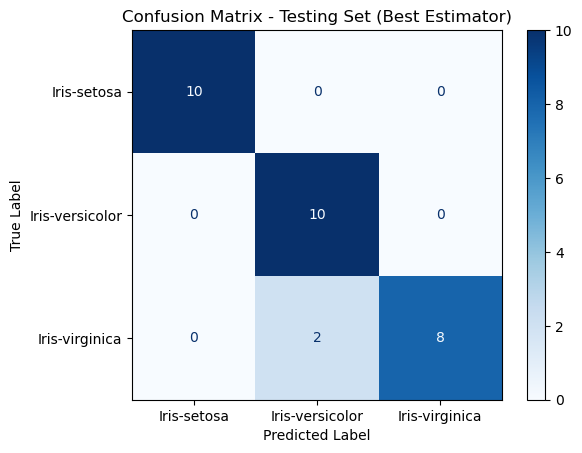

In [13]:

conf_mat_best = confusion_matrix(Y_test, X_test_pred_best)
Matrix_best = ConfusionMatrixDisplay(confusion_matrix=conf_mat_best, display_labels=label.classes_)
Matrix_best.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix - Testing Set (Best Estimator)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
